In [301]:
strategy_name = 'tagNetProfitGrowth3YBiggerThan20P'
offStart = ('close_mtx',0)

In [303]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import pymongo
import numpy as np
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import importlib
import rschLib
np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData
dtes, tkrs, name, open_mtx, high_mtx, low_mtx, close_mtx,belong, shenwan1, shenwan2, shenwan3, vol_mtx, amount_mtx = rschLib.loadDailyBarMtx()

In [304]:
maxD = 5
inTime = 234
otTime = 474
tradeArea=[inTime,otTime]
timeAsFloat, timeLabels, maxM, dayOff, dayTimeAsFloat = rschLib.getTimeLabels(maxD)
importlib.reload(rschLib)
tradesUsed, Po, r, Sale1 = rschLib.getTradesFast(strategy_name, name, tkrs, dtes, maxD, dayTimeAsFloat)

0 / 50177 1200 20200728.0931 20200728.0931


KeyError: 'dateTimeAsFloat'

In [124]:
R = open_mtx[:, 1:]/close_mtx[:,:-1]-1
R = np.hstack((np.zeros((R.shape[0],1)), R))

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [210]:
dicttkrs = dict(zip(tkrs, range(len(tkrs))))
dictdtes = dict(zip(dtes, range(len(dtes))))


In [187]:
q = np.array([int(x) for x in np.floor(dayTimeAsFloat)])
dtesUsed = [x['dateIn'] for x in tradesUsed]
idxOpen = np.nonzero(np.round(dayTimeAsFloat-np.floor(dayTimeAsFloat), 4)==0.0931)[0]
for i in range(r.shape[0]):
    keys = 

In [297]:
timeLabels[240]
timeLabels[240]

'第2天09:31'

In [270]:
i = len(tradesUsed)-251
lendtes = len(dtes)
k1 = dicttkrs[tradesUsed[i]['ticker']]
k2 = dictdtes[tradesUsed[i]['dateIn']]
maxl = np.min((k2+maxD, len(dtes)))
print(r[i, idxOpen[:maxl-k2]], R[k1, k2:maxl])
#r[i, idxOpen[:maxl-k2]] = R[k1, k2:maxl]

[0.000000 0.000000 -0.000657 0.000000 0.000656] [-0.007256 0.001980 0.000000 0.000000 0.000000]


In [298]:
Po[i, idxOpen]
Po[i, idxOpen-1]

array([15.350000, 15.180000, 15.230000, 15.060000, 15.240000])

In [300]:
timeLabels[239]

'第1天15:00'

In [ ]:
问题，缺失最后一秒的开盘到收盘的回报率，以至于无法计算正确的隔夜回报率。 
解决方案：1. r中的每天第一分钟，应该是隔夜收盘

In [281]:
Po[i, 230:240]

array([15.130000, 15.160000, 15.190000, 15.190000, 15.150000, 15.160000,
       15.180000, 15.180000, 15.180000, 15.180000])

In [286]:
timeLabels[230:241]

['第1天14:51',
 '第1天14:52',
 '第1天14:53',
 '第1天14:54',
 '第1天14:55',
 '第1天14:56',
 '第1天14:57',
 '第1天14:58',
 '第1天14:59',
 '第1天15:00',
 '第2天09:31']

In [271]:
tradesUsed[-251]

{'_id': ObjectId('5fbcedae946414ccd6ecab2d'),
 'strategy_name': 'tagNetProfitGrowth3YBiggerThan20P',
 'name': '汇中股份',
 'ticker': 'SZ300371',
 'dateIn': 20201113}

In [273]:
15.18/15.15-1

0.001980198019801982

In [209]:
dictdtes

array([0.000000, nan, nan, ..., 0.000000, 0.008804, 0.002227])

In [207]:
R.shape

(4654, 3862)

In [167]:
i = 0
j = 0
dictOpenFromCloseByDtesAndTkrs = {}
strdtes = [str(x) for x in dtes]
a = datetime.datetime.now()
for i in range(len(dtes)-750,len(dtes)):
    for j in range(len(tkrs)):
        dictOpenFromCloseByDtesAndTkrs[strdtes[i]+tkrs[j]]=R[j,i]
b = datetime.datetime.now()
print(b-a)


0:00:07.754383


In [120]:
Po = rschLib.zero2pre(Po)
P = Po
r=P[:,1:]/P[:,:-1] - 1
r=np.hstack((np.zeros((r.shape[0],1)),r))


In [122]:
m = np.min(r, axis=1)
idx = np.nonzero(m<-0.2)[0]
dd = np.array(dayTimeAsFloat)
for j in idx:
    pp = r[j,:]<-0.2
    if (np.round((dd[pp]-np.floor(dd[pp]))[0],4)==0.0931):
        r[j,pp] = 0
    else:
        print(np.min(r[j,:]), (dd[pp]-np.floor(dd[pp])), dd[pp])

In [123]:
[a,b]=np.min

-0.17127564674397877

In [114]:
pp = r[j,:]<-0.1
if (np.round((dd[pp]-np.floor(dd[pp]))[0],4)==0.0931):
    r[j,pp] = 0
else:
    print(np.min(r[j,:]), (dd[pp]-np.floor(dd[pp])), dd[pp])

In [115]:
r[j, pp]

array([0.000000])

In [116]:
np.nonzero(r==np.min(r))

(array([14402, 14482], dtype=int64), array([480, 240], dtype=int64))

In [109]:
j = 14249
pp = r[j,:]<-0.1
np.round((dd[pp]-np.floor(dd[pp]))[0],4)==0.0931
r[j,pp]=0
r[j,pp]

IndexError: index 0 is out of bounds for axis 0 with size 0

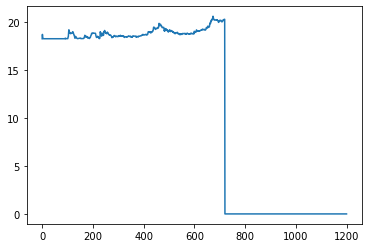

In [39]:
plt.plot((Po[56,:]))

In [25]:
np.quantile(r,0.00001)

-0.23711882229232384

In [4]:
importlib.reload(rschLib)
trades, tradesUsed, Po, r = rschLib.getTrades(strategy_name, name, tkrs, dtes, maxD, maxM)

0 / 219130 4800 2018-10-19 01:31:00 2018-11-15 07:00:00
10000 / 219130 4800 2018-11-27 01:31:00 2018-12-24 07:00:00
20000 / 219130 4800 2019-01-07 01:31:00 2019-02-01 07:00:00
30000 / 219130 4800 2019-02-20 01:31:00 2019-03-19 07:00:00
40000 / 219130 4800 2019-03-29 01:31:00 2019-04-26 07:00:00
50000 / 219130 4800 2019-05-08 01:31:00 2019-06-04 07:00:00
60000 / 219130 4800 2019-06-11 01:31:00 2019-07-08 07:00:00
70000 / 219130 4800 2019-07-15 01:31:00 2019-08-09 07:00:00
80000 / 219130 5280 2019-08-14 01:31:00 2019-09-10 07:00:00
90000 / 219130 4800 2019-09-16 01:31:00 2019-10-18 07:00:00
100000 / 219130 4800 2019-10-23 01:31:00 2019-11-19 07:00:00
110000 / 219130 4800 2019-11-21 01:31:00 2019-12-18 07:00:00
120000 / 219130 4800 2019-12-20 01:31:00 2020-01-17 07:00:00
130000 / 219130 4800 2020-01-22 01:31:00 2020-02-26 07:00:00
140000 / 219130 4800 2020-02-28 01:31:00 2020-03-26 07:00:00
150000 / 219130 4800 2020-03-31 01:31:00 2020-04-28 07:00:00
160000 / 219130 4800 2020-04-30 01:31:

AutoReconnect: localhost:27017: [WinError 10054] 远程主机强迫关闭了一个现有的连接。

In [ ]:
importlib.reload(rschLib)
result = rschLib.getTradeAnalysisSampleGroups(r, tradeArea)

In [ ]:
#h = np.max(np.cumsum(r[:, :tradeArea[0]], axis=1), axis=1)
#isZhangtingBeforeTradeArea = h>=0.05
importlib.reload(rschLib)
rschLib.drawPriceChange(r, strategy_name, timeLabels=timeLabels, tp=tradeArea)
rschLib.drawPriceChange(result['rGood10'], strategy_name, timeLabels=timeLabels, title='盈利前10%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rGood20'], strategy_name, timeLabels=timeLabels, title='盈利前20%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rGood30'], strategy_name, timeLabels=timeLabels, title='盈利前30%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad10'], strategy_name, timeLabels=timeLabels, title='亏损前10%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad10'], strategy_name, timeLabels=timeLabels, title='亏损前20%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad10'], strategy_name, timeLabels=timeLabels, title='亏损前30%交易', tp=tradeArea)

In [ ]:
importlib.reload(rschLib)
rschLib.analyzeTradeTags(trades, result['rGood10'], result['idxGood10'], '盈利前10%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rGood20'], result['idxGood20'], '盈利前20%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rGood30'], result['idxGood30'], '盈利前30%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad10'], result['idxBad10'], '亏损前10%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad20'], result['idxBad20'], '亏损前20%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad30'], result['idxBad30'], '亏损前30%交易',strategy_name, dtes, name, offStart)

In [ ]:
importlib.reload(rschLib)
[dtesPnl,pnl, numTrades]=rschLib.getPnl(dtes,tkrs, name, trades, inTime, otTime, dayOff, timeAsFloat, toDatabase='yes')

In [ ]:
importlib.reload(rschLib)
rschLib.pnlVsNumtrades(pnl, numTrades, strategy_name)